In [23]:
import sys
sys.path.append('../')

%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from skimage.io import imread
import cv2

from gen.load_data import load_data
from gen.generators import preprocess_label


In [25]:
from sklearn.utils import shuffle

train_df, valid_df, test_df = load_data('../data')

train_df = shuffle(train_df)
valid_df = shuffle(valid_df)



In [26]:
train_df.head()

image                   id  \
3612  ../data/Train/CameraRGB/episode_0004_000185.png  episode_0004_000185   
1631                  ../data/Train/CameraRGB/331.png                  331   
3084  ../data/Train/CameraRGB/episode_0011_000042.png  episode_0011_000042   
2791  ../data/Train/CameraRGB/episode_0006_000062.png  episode_0006_000062   
2673  ../data/Train/CameraRGB/episode_0003_000210.png  episode_0003_000210   

                                                label  
3612  ../data/Train/CameraSeg/episode_0004_000185.png  
1631                  ../data/Train/CameraSeg/331.png  
3084  ../data/Train/CameraSeg/episode_0011_000042.png  
2791  ../data/Train/CameraSeg/episode_0006_000062.png  
2673  ../data/Train/CameraSeg/episode_0003_000210.png

In [27]:
valid_df.head()

image     id  \
430  ../data/Valid/CameraRGB/00357.png  00357   
293  ../data/Valid/CameraRGB/00132.png  00132   
264  ../data/Valid/CameraRGB/00318.png  00318   
493  ../data/Valid/CameraRGB/00275.png  00275   
200  ../data/Valid/CameraRGB/00211.png  00211   

                                 label  
430  ../data/Valid/CameraSeg/00357.png  
293  ../data/Valid/CameraSeg/00132.png  
264  ../data/Valid/CameraSeg/00318.png  
493  ../data/Valid/CameraSeg/00275.png  
200  ../data/Valid/CameraSeg/00211.png

In [28]:
test_df.head()

image     id                             label
0  ../data/Test/CameraRGB/00019.png  00019  ../data/Test/CameraSeg/00019.png
1  ../data/Test/CameraRGB/00413.png  00413  ../data/Test/CameraSeg/00413.png
2  ../data/Test/CameraRGB/00035.png  00035  ../data/Test/CameraSeg/00035.png
3  ../data/Test/CameraRGB/00264.png  00264  ../data/Test/CameraSeg/00264.png
4  ../data/Test/CameraRGB/00172.png  00172  ../data/Test/CameraSeg/00172.png

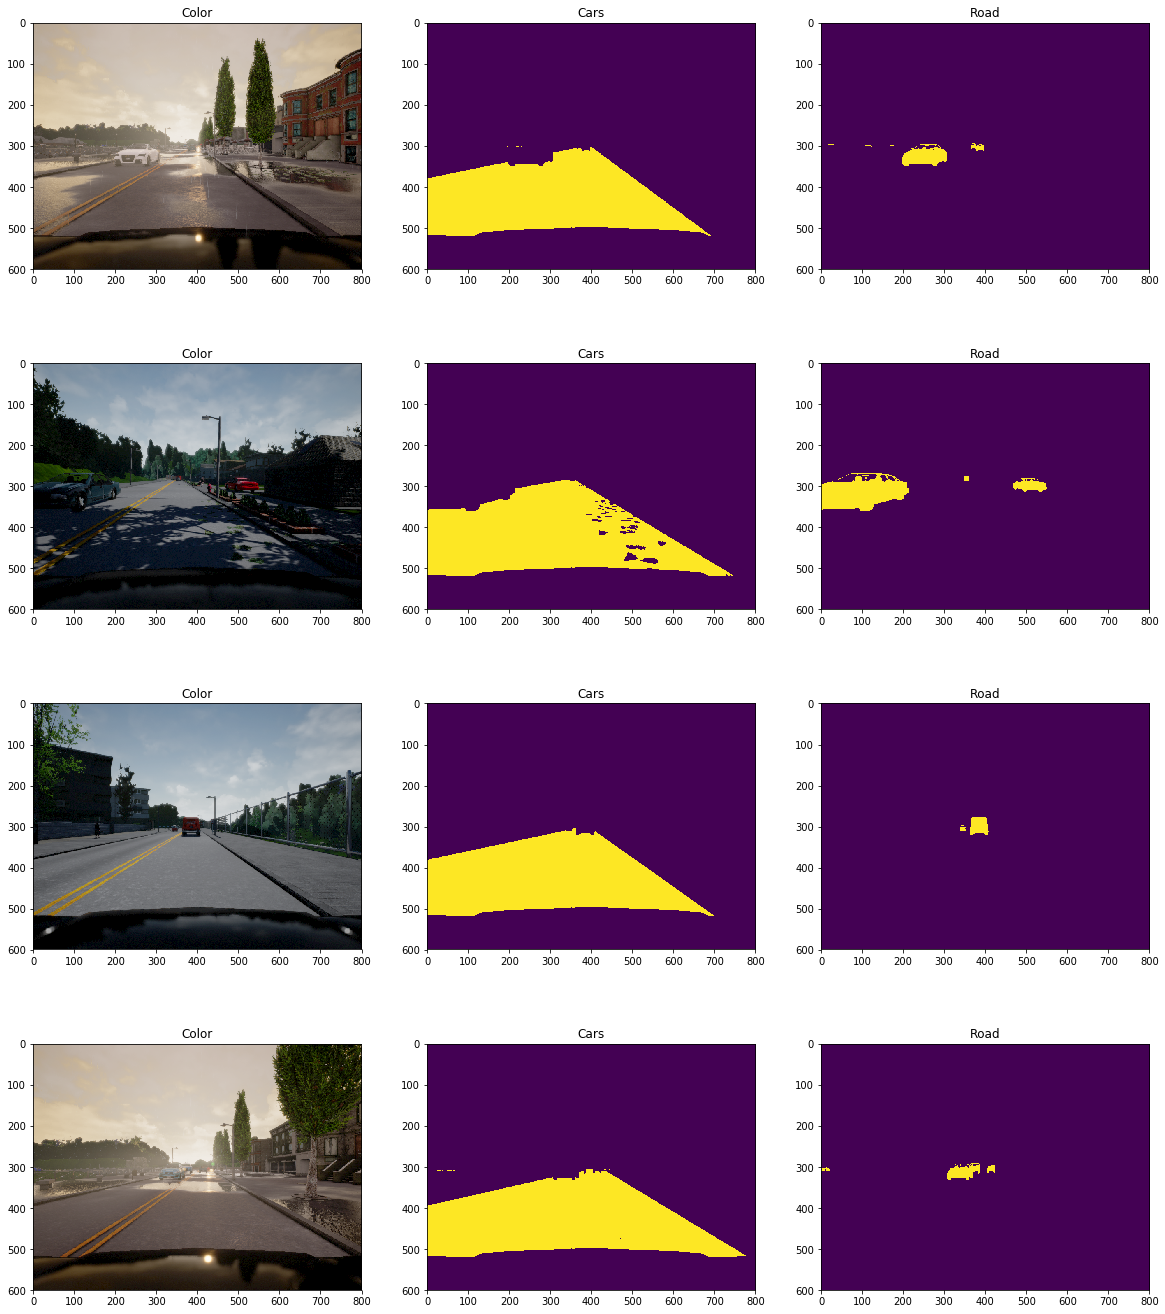

In [7]:
sample_rows = 4
fig, m_axs = plt.subplots(sample_rows, 3, figsize = (20, 6*sample_rows))
for (ax1, ax2, ax3), (_, c_row) in zip(m_axs, train_df.sample(sample_rows).iterrows()):
    c_img = imread(c_row['image'])
    
    l_img = imread(c_row['label'])
    
    lbls = np.zeros_like(l_img)
    lbls[l_img == 10] = 1
    lbls[l_img == 7] = 2
    
    ax1.imshow(c_img)
    ax1.set_title('Color')    
    ax2.imshow(preprocess_label(l_img)[:, :, 1])
    ax2.set_title('Cars')
    ax3.imshow(preprocess_label(l_img)[:, :, 0])
    ax3.set_title('Road')

In [29]:
from gen.generators import gen_func_patch, preprocess_label
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input

img_gen_args = dict(samplewise_center=False, 
                              samplewise_std_normalization=False, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range = 0.1, 
                              width_shift_range = 0.1, 
                              rotation_range = 3, 
                              shear_range = 0.01,
                              fill_mode = 'nearest',
                              zoom_range = 0.05)

rgb_gen = ImageDataGenerator(preprocessing_function=preprocess_input, **img_gen_args)
lab_gen = ImageDataGenerator(preprocessing_function = preprocess_label, **img_gen_args)

rgb_gen2 = ImageDataGenerator(preprocessing_function=preprocess_input)
lab_gen2 = ImageDataGenerator(preprocessing_function = preprocess_label)

train_and_lab_gen = gen_func_patch(train_df, rgb_gen2, lab_gen2, image_size=(600, 800), target_size=(320, 416), batch_size = 32)
# valid_and_lab_gen = gen_func(valid_df, rgb_gen2, lab_gen2, image_size=(600, 800), target_size=(480, 480), batch_size = 32)
# test_and_lab_gen = gen_func(test_df, rgb_gen2, lab_gen2, image_size=(600, 800),  target_size=(480, 480), batch_size = 32)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 4822 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 4822 images
[0. 1.]
[0. 1.]
[0. 1.]
[0.         0.00480769 0.00480771 0.01442307 0.01442308 0.02403843
 0.02403846 0.03365385 0.03365386 0.04326922 0.05288462 0.05288464
 0.0625     0.07211536 0.07211538 0.08173077 0.08173078 0.09134614
 0.09134615 0.10096154 0.10096157 0.11057692 0.11057693 0.12019229
 0.1201923  0.1298077  0.12980771 0.13942307 0.14903843 0.14903846
 0.15865384 0.15865386 0.16826922 0.16826923 0.17788461 0.17788464
 0.1875     0.19711536 0.19711539 0.20673077 0.20673078 0.21634614
 0.21634616 0.22596154 0.22596157 0.23557693 0.24519229 0.2451923
 0.25480768 0.25480771 0.26442307 0.27403843 0.27403846 0.28365386
 0.29326922 0.30288461 0.30288464 0.3125     0.32211536 0.32211539
 0.33173078 0.34134614 0.35096154

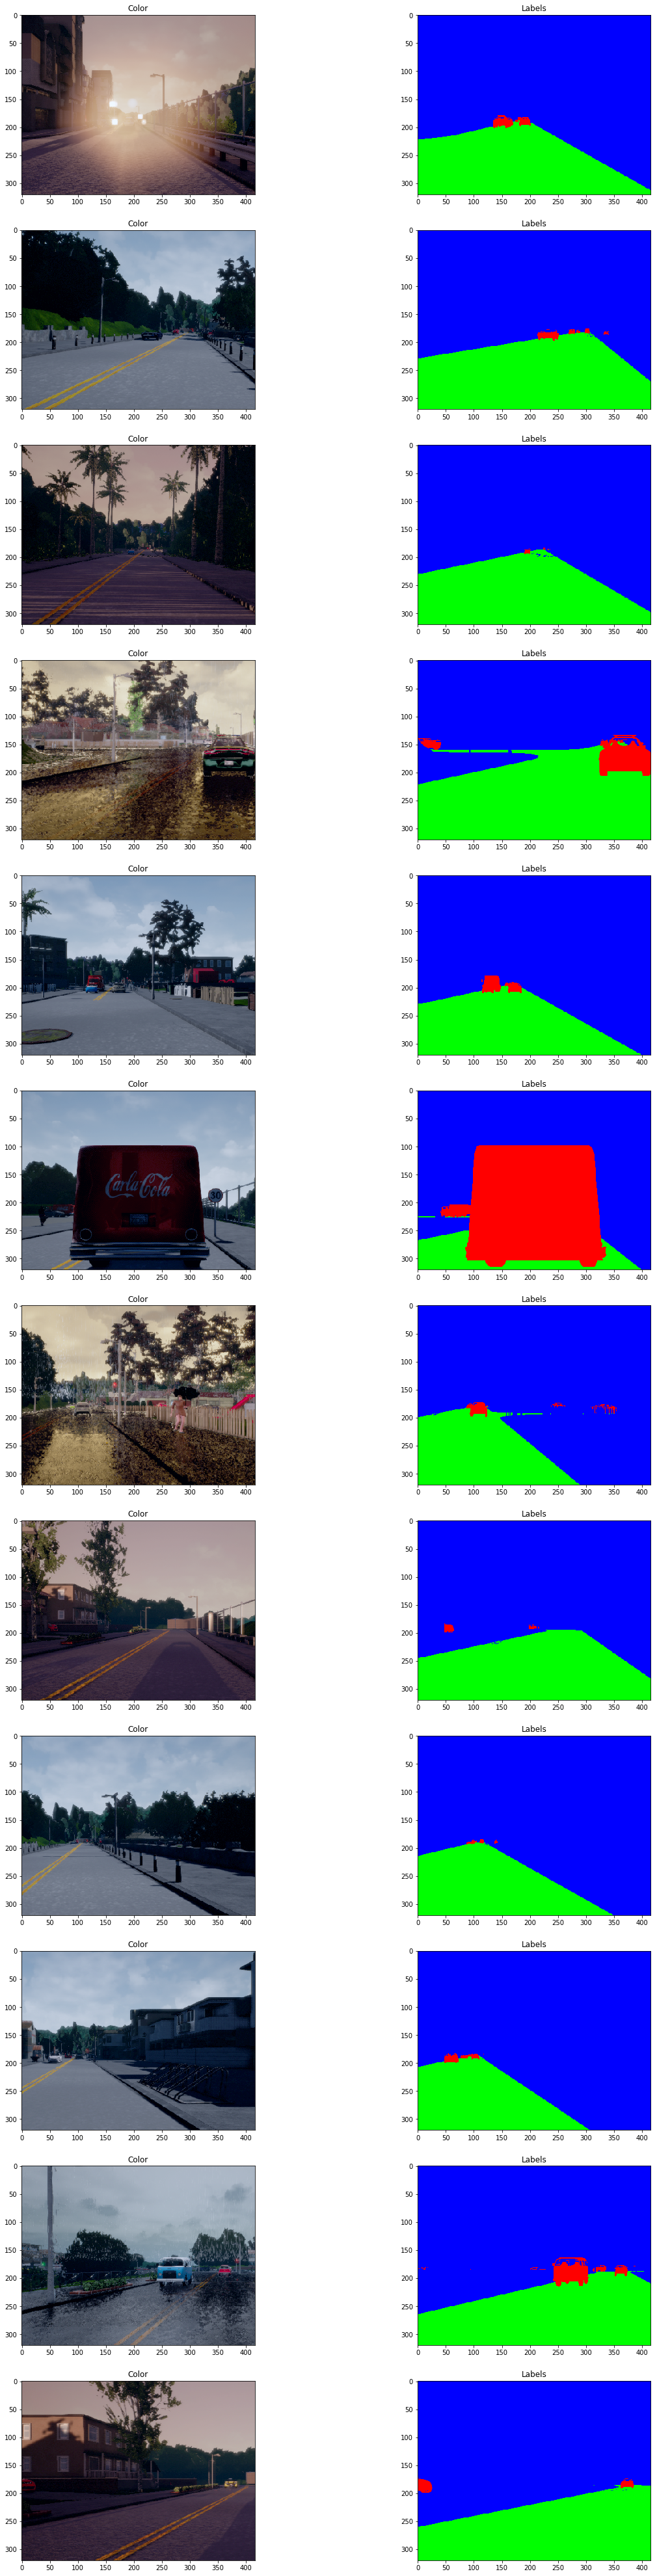

In [30]:
(rgb_batch, lab_batch) = next(train_and_lab_gen)

sample_rows = 12
fig, m_axs = plt.subplots(sample_rows, 2, figsize = (20, 6*sample_rows))
# [c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2), rgb_img, lab_img in zip(m_axs, rgb_batch, lab_batch):
    # undoing the vgg correction is tedious
    print (np.unique(lab_img))
    r_rgb_img = np.clip(rgb_img+110, 0, 255).astype(np.uint8)
    ax1.imshow(cv2.cvtColor(r_rgb_img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Color')
    ax2.imshow(lab_img)
    ax2.set_title('Labels')

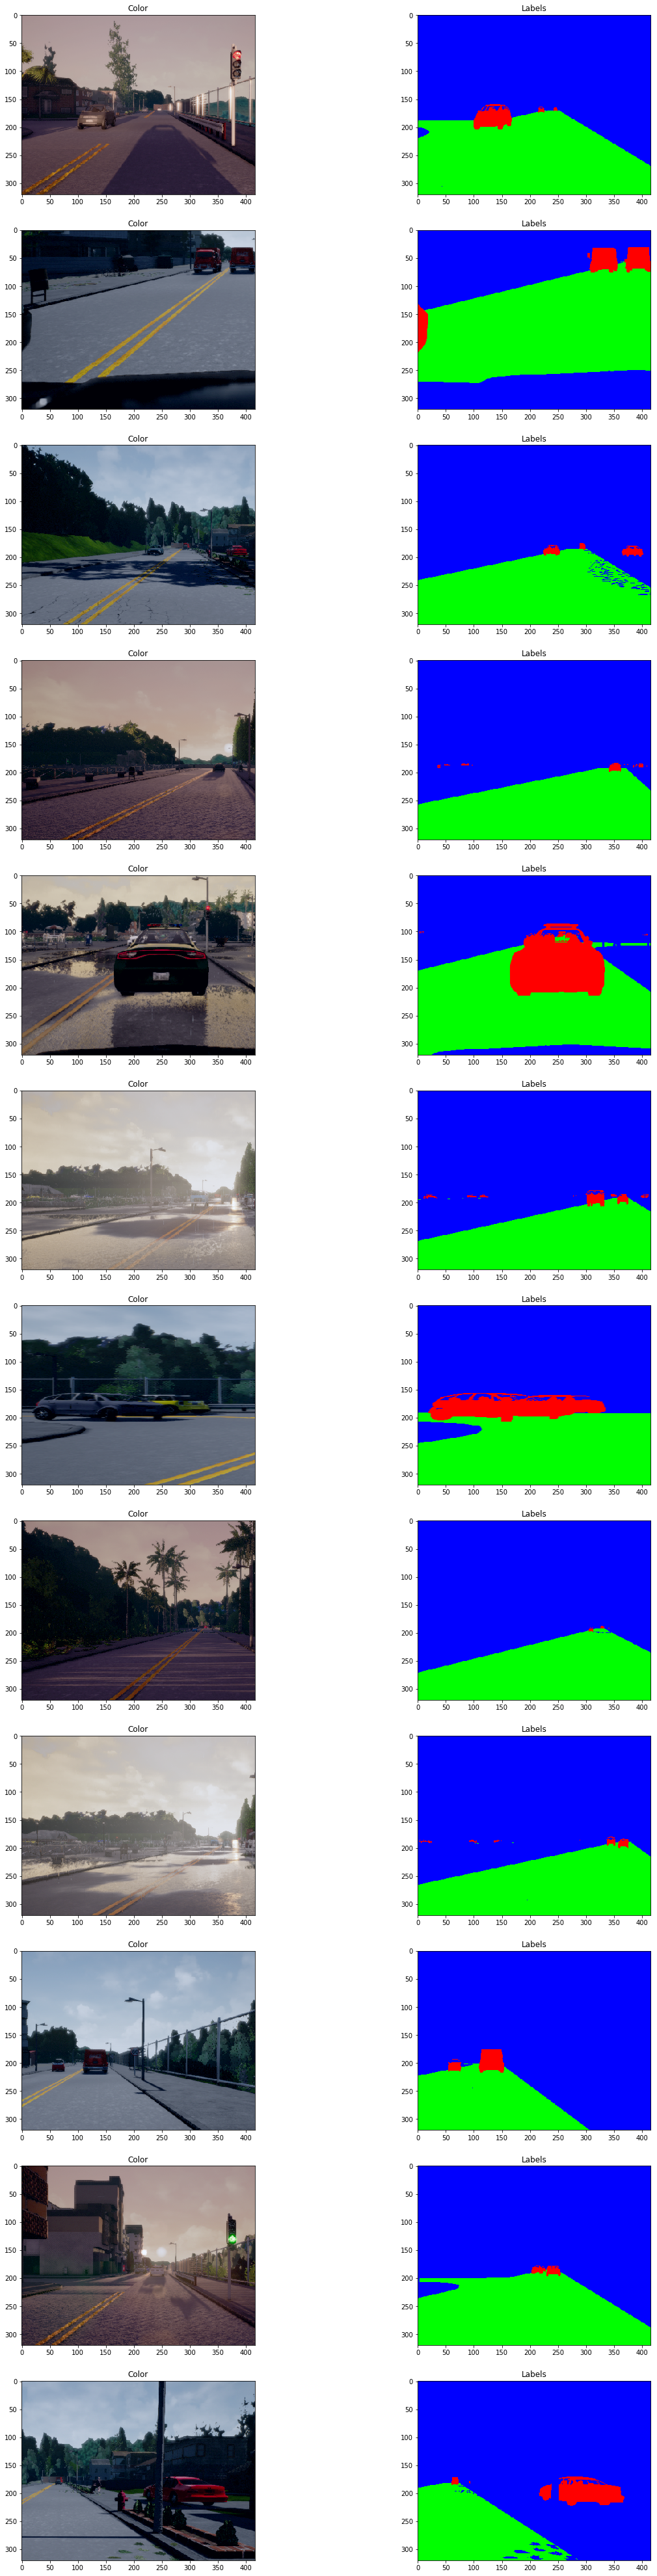

In [10]:
(rgb_batch, lab_batch) = next(train_and_lab_gen)

sample_rows = 12
fig, m_axs = plt.subplots(sample_rows, 2, figsize = (20, 6*sample_rows))
# [c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2), rgb_img, lab_img in zip(m_axs, rgb_batch, lab_batch):
    # undoing the vgg correction is tedious
    r_rgb_img = np.clip(rgb_img+110, 0, 255).astype(np.uint8)
    ax1.imshow(cv2.cvtColor(r_rgb_img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Color')
    ax2.imshow(lab_img)
    ax2.set_title('Labels')

In [ ]:
(rgb_batch, lab_batch) = next(valid_and_lab_gen)

sample_rows = 12
fig, m_axs = plt.subplots(sample_rows, 2, figsize = (20, 6*sample_rows))
# [c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2), rgb_img, lab_img in zip(m_axs, rgb_batch, lab_batch):
    # undoing the vgg correction is tedious
    r_rgb_img = np.clip(rgb_img+110, 0, 255).astype(np.uint8)
    ax1.imshow(r_rgb_img)
    ax1.set_title('Color')
    ax2.imshow(lab_img)
    ax2.set_title('Labels')

In [ ]:
(rgb_batch, lab_batch) = next(test_and_lab_gen)

sample_rows = 12
fig, m_axs = plt.subplots(sample_rows, 2, figsize = (20, 6*sample_rows))
# [c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2), rgb_img, lab_img in zip(m_axs, rgb_batch, lab_batch):
    # undoing the vgg correction is tedious
    r_rgb_img = np.clip(rgb_img+110, 0, 255).astype(np.uint8)
    ax1.imshow(r_rgb_img)
    ax1.set_title('Color')
    ax2.imshow(lab_img)
    ax2.set_title('Labels')

In [ ]:
import skvideo.io

video = skvideo.io.vread('../challenge_workspace/test_video.mp4')

plt.imshow(video[0])


In [ ]:

train_df.sample(1500).iterrows():
    print (row)
    break

In [ ]:
from gen.generators import preprocess_label

bg, road, cars = 0, 0, 0
# for i, row in train_df.sample(2500).iterrows():
#     l = preprocess_label(imread(row['label']))
    
#     cars += l[:, :, 0].nonzero()[1].shape[0]
#     road += l[:, :, 1].nonzero()[1].shape[0]
#     bg   += l[:, :, 2].nonzero()[1].shape[0]

# print (bg, road, cars)


bg, road, cars = 0, 0, 0

for i in range(train_df.shape[0]//32):
    x, y = next(train_and_lab_gen)
    for l in y:
        cars += l[:, :, 0].nonzero()[1].shape[0]
        road += l[:, :, 1].nonzero()[1].shape[0]
        bg   += l[:, :, 2].nonzero()[1].shape[0]

In [ ]:
t = bg + road + cars
car_p = cars/t * 100.0
road_p = road/t * 100.0
bg_p = bg/t * 100.0

In [ ]:
print ("Car {}%, Road {}%, BG {}%".format(car_p, road_p, bg_p))

In [ ]:
1/car_p

In [ ]:
1/road_p

In [ ]:
1/bg_p

In [21]:

from gen.generators import gen_func_patch, preprocess_label,  preprocess_multi_label
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input

img_gen_args = dict(samplewise_center=False, 
                              samplewise_std_normalization=False, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range = 0.1, 
                              width_shift_range = 0.1, 
                              rotation_range = 3, 
                              shear_range = 0.01,
                              fill_mode = 'nearest',
                              zoom_range = 0.05)

rgb_gen = ImageDataGenerator(preprocessing_function=preprocess_input, **img_gen_args)
lab_gen = ImageDataGenerator(preprocessing_function = preprocess_multi_label, **img_gen_args)

rgb_gen2 = ImageDataGenerator(preprocessing_function=preprocess_input)
lab_gen2 = ImageDataGenerator(preprocessing_function = preprocess_multi_label)

train_and_lab_gen = gen_func_patch(train_df, rgb_gen2, lab_gen2, image_size=(600, 800), target_size=(320, 416), batch_size = 32)
# valid_and_lab_gen = gen_func(valid_df, rgb_gen2, lab_gen2, image_size=(600, 800), target_size=(480, 480), batch_size = 32)
# test_and_lab_gen = gen_func(test_df, rgb_gen2, lab_gen2, image_size=(600, 800),  target_size=(480, 480), batch_size = 32)

In [22]:
(rgb_batch, lab_batch) = next(train_and_lab_gen)

sample_rows = 12
fig, m_axs = plt.subplots(sample_rows, 2, figsize = (20, 6*sample_rows))
# [c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2), rgb_img, lab_img in zip(m_axs, rgb_batch, lab_batch):
    # undoing the vgg correction is tedious
    r_rgb_img = np.clip(rgb_img+110, 0, 255).astype(np.uint8)
    ax1.imshow(cv2.cvtColor(r_rgb_img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Color')
    ax2.imshow(lab_img)
    ax2.set_title('Labels')

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 4822 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 4822 images


ValueError: could not broadcast input array from shape (600,800,3) into shape (600,800,12,3)